In [1]:
import os 
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn as sklearn
import matplotlib

In [2]:
path="/Users/nazeeha/Downloads"
os.chdir(path)

In [3]:
df = pd.read_csv("ASSIDATA_CE888.csv")
df.head()

,INCIDENT_DATE,INCIDENT_TIME,UOF_NUMBER,OFFICER_ID,OFFICER_GENDER,OFFICER_RACE,OFFICER_HIRE_DATE,OFFICER_YEARS_ON_FORCE,OFFICER_INJURY,OFFICER_INJURY_TYPE,...,TYPE_OF_FORCE_USED3,TYPE_OF_FORCE_USED4,TYPE_OF_FORCE_USED5,TYPE_OF_FORCE_USED6,TYPE_OF_FORCE_USED7,TYPE_OF_FORCE_USED8,TYPE_OF_FORCE_USED9,TYPE_OF_FORCE_USED10,NUMBER_EC_CYCLES,FORCE_EFFECTIVE
0,OCCURRED_D,OCCURRED_T,UOFNum,CURRENT_BA,OffSex,OffRace,HIRE_DT,INCIDENT_DATE_LESS_,OFF_INJURE,OFF_INJURE_DESC,...,ForceType3,ForceType4,ForceType5,ForceType6,ForceType7,ForceType8,ForceType9,ForceType10,Cycles_Num,ForceEffec
1,9/3/16,4:14:00 AM,37702,10810,Male,Black,5/7/14,2,No,No injuries noted or visible,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
2,3/22/16,11:00:00 PM,33413,7706,Male,White,1/8/99,17,Yes,Sprain/Strain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
3,5/22/16,1:29:00 PM,34567,11014,Male,Black,5/20/15,1,No,No injuries noted or visible,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
4,1/10/16,8:55:00 PM,31460,6692,Male,Black,7/29/91,24,No,No injuries noted or visible,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes


In [4]:
#first row seems redundant
df = df.drop(index=[0] , axis=0)

In [5]:
df.head()

,INCIDENT_DATE,INCIDENT_TIME,UOF_NUMBER,OFFICER_ID,OFFICER_GENDER,OFFICER_RACE,OFFICER_HIRE_DATE,OFFICER_YEARS_ON_FORCE,OFFICER_INJURY,OFFICER_INJURY_TYPE,...,TYPE_OF_FORCE_USED3,TYPE_OF_FORCE_USED4,TYPE_OF_FORCE_USED5,TYPE_OF_FORCE_USED6,TYPE_OF_FORCE_USED7,TYPE_OF_FORCE_USED8,TYPE_OF_FORCE_USED9,TYPE_OF_FORCE_USED10,NUMBER_EC_CYCLES,FORCE_EFFECTIVE
1,9/3/16,4:14:00 AM,37702,10810,Male,Black,5/7/14,2,No,No injuries noted or visible,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
2,3/22/16,11:00:00 PM,33413,7706,Male,White,1/8/99,17,Yes,Sprain/Strain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
3,5/22/16,1:29:00 PM,34567,11014,Male,Black,5/20/15,1,No,No injuries noted or visible,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
4,1/10/16,8:55:00 PM,31460,6692,Male,Black,7/29/91,24,No,No injuries noted or visible,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
5,11/8/16,2:30:00 AM,"37879, 37898",9844,Male,White,10/4/09,7,No,No injuries noted or visible,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"No, Yes"


In [6]:
#data size
df.shape

(2383, 47)

In [7]:
df.isna().sum()

INCIDENT_DATE                                      0
INCIDENT_TIME                                     10
UOF_NUMBER                                         0
OFFICER_ID                                         0
OFFICER_GENDER                                     0
OFFICER_RACE                                       0
OFFICER_HIRE_DATE                                  0
OFFICER_YEARS_ON_FORCE                             0
OFFICER_INJURY                                     0
OFFICER_INJURY_TYPE                                0
OFFICER_HOSPITALIZATION                            0
SUBJECT_ID                                         0
SUBJECT_RACE                                       0
SUBJECT_GENDER                                     0
SUBJECT_INJURY                                     0
SUBJECT_INJURY_TYPE                                0
SUBJECT_WAS_ARRESTED                               0
SUBJECT_DESCRIPTION                               76
SUBJECT_OFFENSE                               

##### there are a lot of columns that are empty or with majority null values, and hence not of use .In the remaining columns there are a lot of 
##### columns specifying adress in different forms, we will not be using all of the forms and use restricted features

In [12]:
#some explorations and visualisations

<AxesSubplot:xlabel='SUBJECT_WAS_ARRESTED', ylabel='Count'>

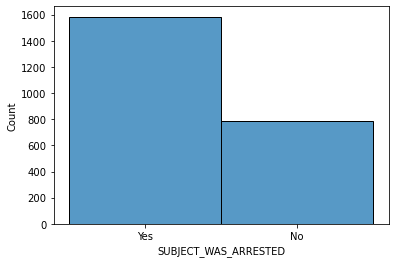

In [16]:
#number of arrests? 
sns.histplot(df , x="SUBJECT_WAS_ARRESTED")

In [ ]:
#however, as this could be considered another sensitive attribute, we will not be including gender or race of 
#officers for bias mitigation

<AxesSubplot:xlabel='OFFICER_YEARS_ON_FORCE', ylabel='Count'>

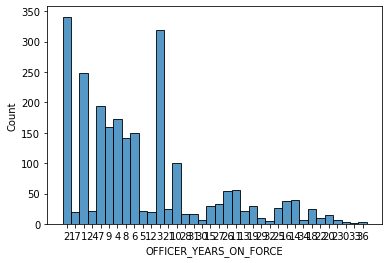

In [11]:
#how much experience do the officers have?
sns.histplot(df , x= "OFFICER_YEARS_ON_FORCE") #the numbers seem to be unsorted

In [13]:
#this could be because the values are strings instead of number, hence converting to numeric values
df['OFFICER_YEARS_ON_FORCE'] = pd.to_numeric(df['OFFICER_YEARS_ON_FORCE'])

<AxesSubplot:xlabel='OFFICER_YEARS_ON_FORCE', ylabel='Count'>

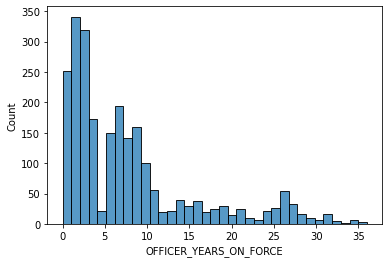

In [15]:
sns.histplot(df , x= "OFFICER_YEARS_ON_FORCE") #officer with lower experience are more

In [ ]:
#further data preprocessing for bias detection and mitigation are done in two different notebooks